# Abstract

In [5]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer, NewtonOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Newton's Method

# Testing Newton Method Implementation
In order to test the correctness of the Newton's Method implementation, I will demonstrate for a sufficiently small learning rate `α`, Newton's Method coverges to the same result that regular gradient descent would achieve. 

In [1]:
import torch
def generate_classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y

X, y = generate_classification_data(noise = 0.5)

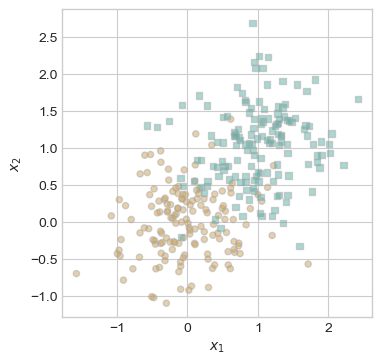

In [25]:
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

def plot_classification_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_classification_data(X, y, ax)


In [43]:
# Logistic Regression model with gradient descent optimizer
LR_GD = LogisticRegression()
opt_GD = GradientDescentOptimizer(LR_GD)

#Logistic Regression model with Newton's Method optimizer 
LR_NM = LogisticRegression()
opt_NM = NewtonOptimizer(LR_NM)

num_iterations = 1000
for _ in range(num_iterations):
    opt_GD.step(X, y, 0.1, 0)
    opt_NM.step(X, y, 0.01)
print(f"Gradient Descent Logistic Regression Loss: {LR_GD.loss(X,y)}\nNewton's Method Logistic Regression Loss: {LR_NM.loss(X,y)}\n")



Gradient Descent Logistic Regression Loss: 0.22715936601161957
Newton's Method Logistic Regression Loss: 0.5841323733329773



# Results
Here, we demonstrate that Logistic Regression using either Newton's Method or Gradient Descent optimization can converge to a similar value given enough iterations and a small enough learning rate `α`.